In [1]:
import spyx
import spyx.nn as snn

import jax
import jax.numpy as jnp
import numpy as np

import nir

import matplotlib.pyplot as plt

In [2]:
input_data = jnp.array(np.load("val_numbers.npy"), dtype=jnp.float32)

In [3]:
input_data.shape

(300, 10, 2, 34, 34)

In [4]:
ng = nir.read("scnn_mnist.nir")
[type(v) for v in ng.nodes.values()]

[nir.ir.Conv2d,
 nir.ir.IF,
 nir.ir.IF,
 nir.ir.Affine,
 nir.ir.IF,
 nir.ir.Conv2d,
 nir.ir.IF,
 nir.ir.SumPool2d,
 nir.ir.Conv2d,
 nir.ir.IF,
 nir.ir.SumPool2d,
 nir.ir.Flatten,
 nir.ir.Affine,
 nir.ir.Input,
 nir.ir.Output]

In [5]:
SNN, params = spyx.nir.from_nir(ng, input_data, dt=1, return_all_states=True)

In [6]:
params.keys()

dict_keys(['conv2_d', 'conv2_d_1', 'conv2_d_2', 'linear', 'linear_1'])

In [7]:
a, b = SNN.apply(params, input_data)

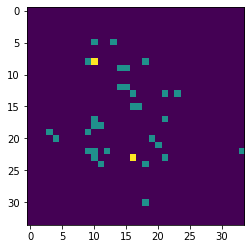

In [8]:
plt.imshow(jnp.sum(input_data[6], axis=(0,1)))

In [9]:
a.sum()

Array(151., dtype=float32)

In [25]:
a[21]

Array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [12]:
b[0].shape

(300, 10, 16, 16, 16)

In [10]:
for layer in b:
    print(layer.shape)

(300, 10, 16, 16, 16)
(300, 10, 16, 16, 16)
(300, 10, 8, 8, 8)
(300, 10, 256)
(300, 10, 10)
